link https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md

In [1]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [34 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-slr2wg0v/pyyaml_05c5a6ccaca44a078bb723ef8b662bda/setup.py", line 291, in <module>
          setup(
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/core.py", line 184, in setup
          return run_commands(dist)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/core.py", line 200, in run_commands
          dist.run_commands()
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/dist.py", line 969, in run_commands
          self.run_command(cmd)
        File "/opt/conda/lib/pyth

In [2]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)






import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import numpy as np
import os, json, cv2, random
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog





from detectron2.data.datasets import register_coco_instances

from detectron2.data.datasets import register_coco_instances

register_coco_instances("my_dataset_train", {}, "/kaggle/input/sat-img-all/combined_1/train/_annotations.coco.json",
                        "/kaggle/input/sat-img-all/combined_1/train")

register_coco_instances("my_dataset_val", {}, "/kaggle/input/sat-img-all/combined_1/valid/_annotations.coco.json",
                        "/kaggle/input/sat-img-all/combined_1/valid")



train_metadata = MetadataCatalog.get("my_dataset_train")
train_dataset_dicts = DatasetCatalog.get("my_dataset_train")



val_metadata = MetadataCatalog.get("my_dataset_val")
val_dataset_dicts = DatasetCatalog.get("my_dataset_val")

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Nov_22_10:17:15_PST_2023
Cuda compilation tools, release 12.3, V12.3.107
Build cuda_12.3.r12.3/compiler.33567101_0
torch:  2.4 ; cuda:  2.4.0
detectron2: 0.6
WARNING [11/10 20:31:11 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/10 20:31:11 d2.data.datasets.coco]: Loaded 184 images in COCO format from /kaggle/input/sat-img-all/combined_1/train/_annotations.coco.json
WARNING [11/10 20:31:11 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/10 20:31:11 d2.data.datasets.coco]: Loaded 62 images in COCO format from /kaggle/input/sat-img-all/combined_1/valid/_annotations.coco.json


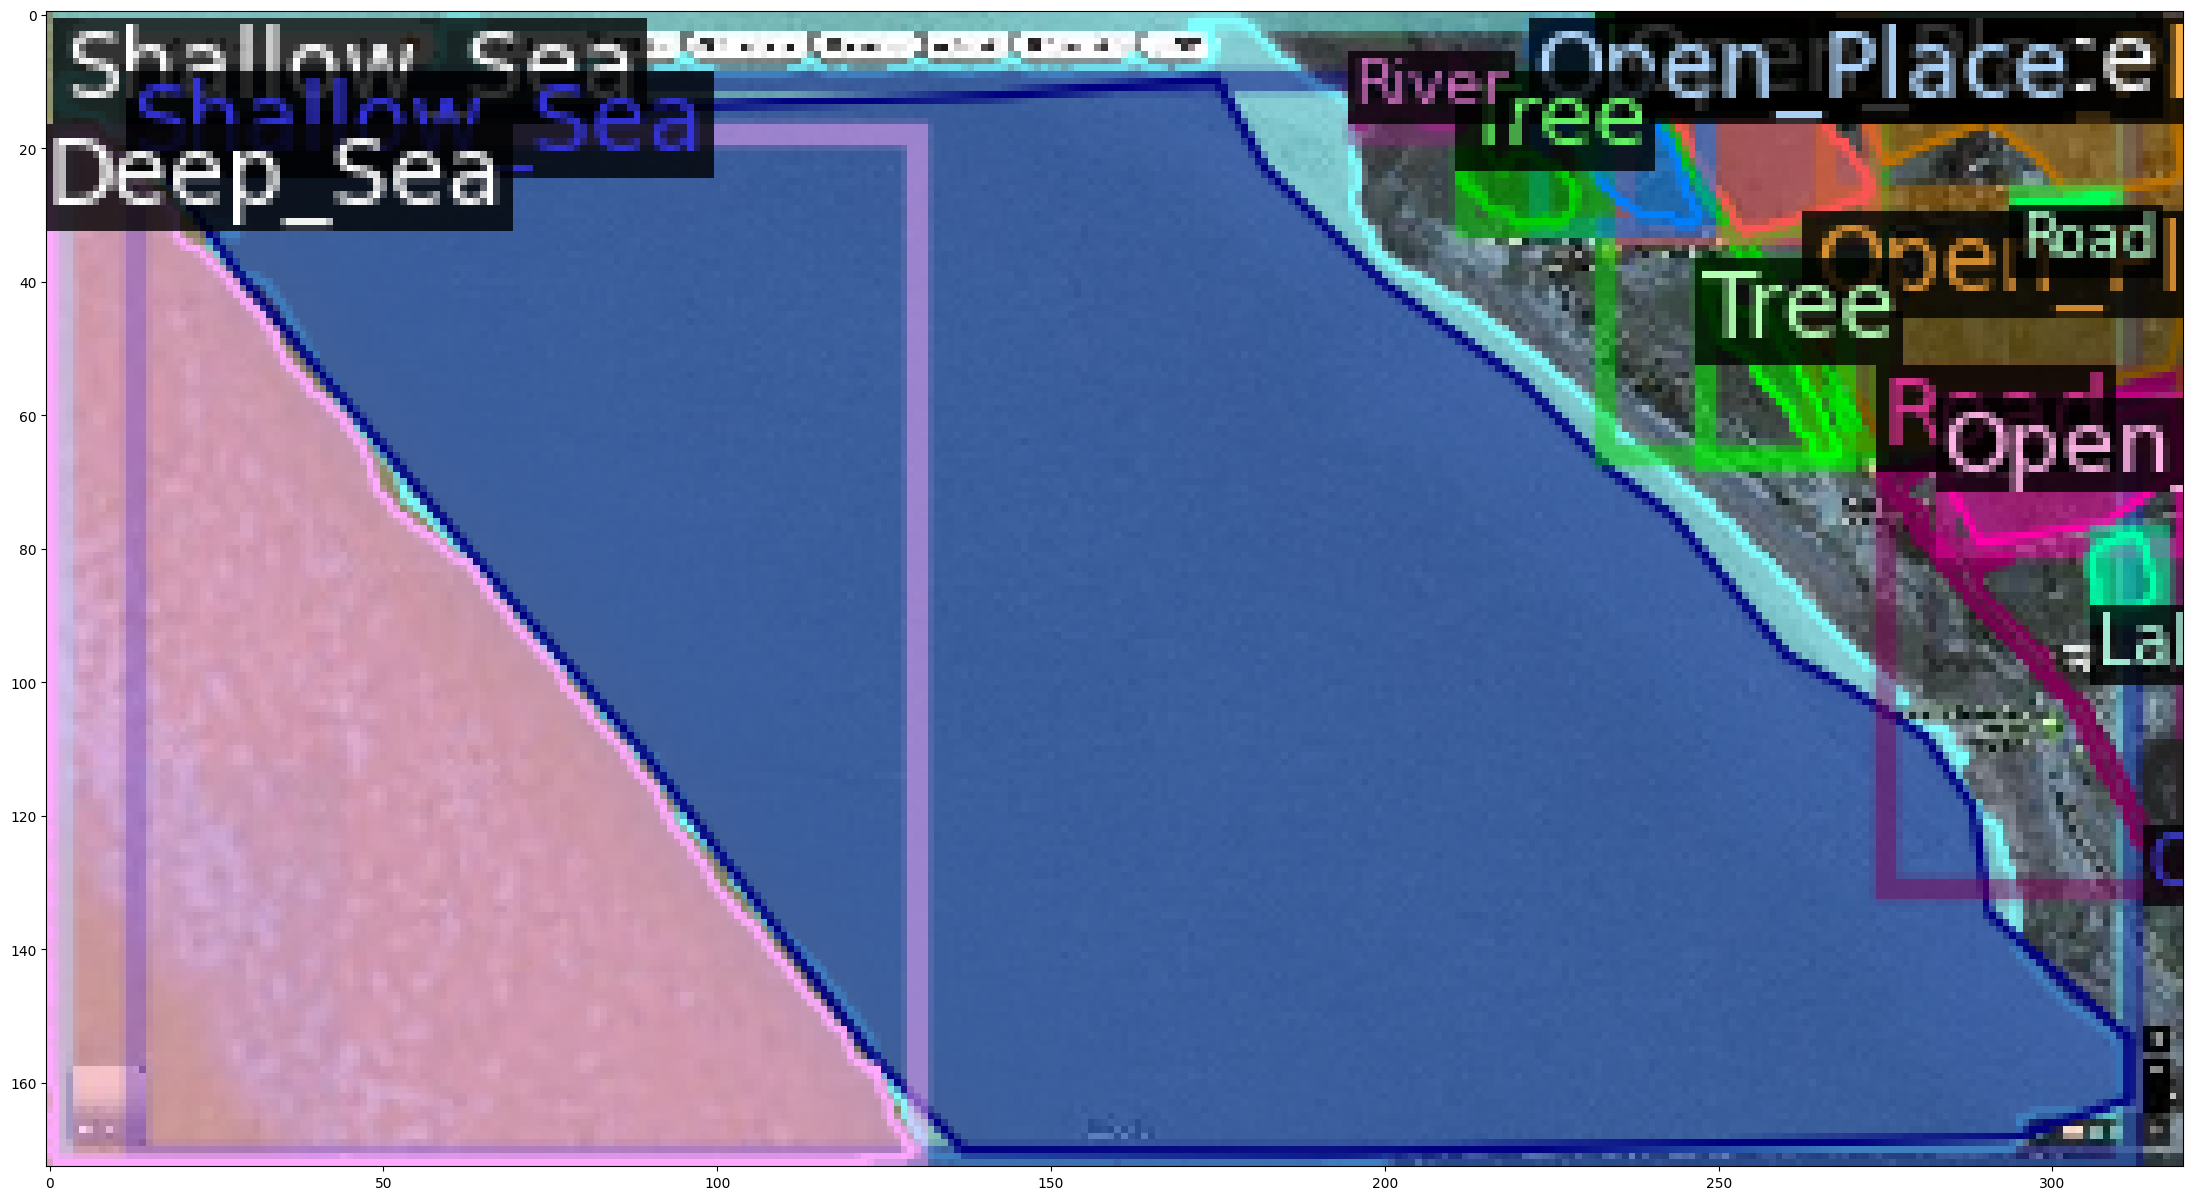

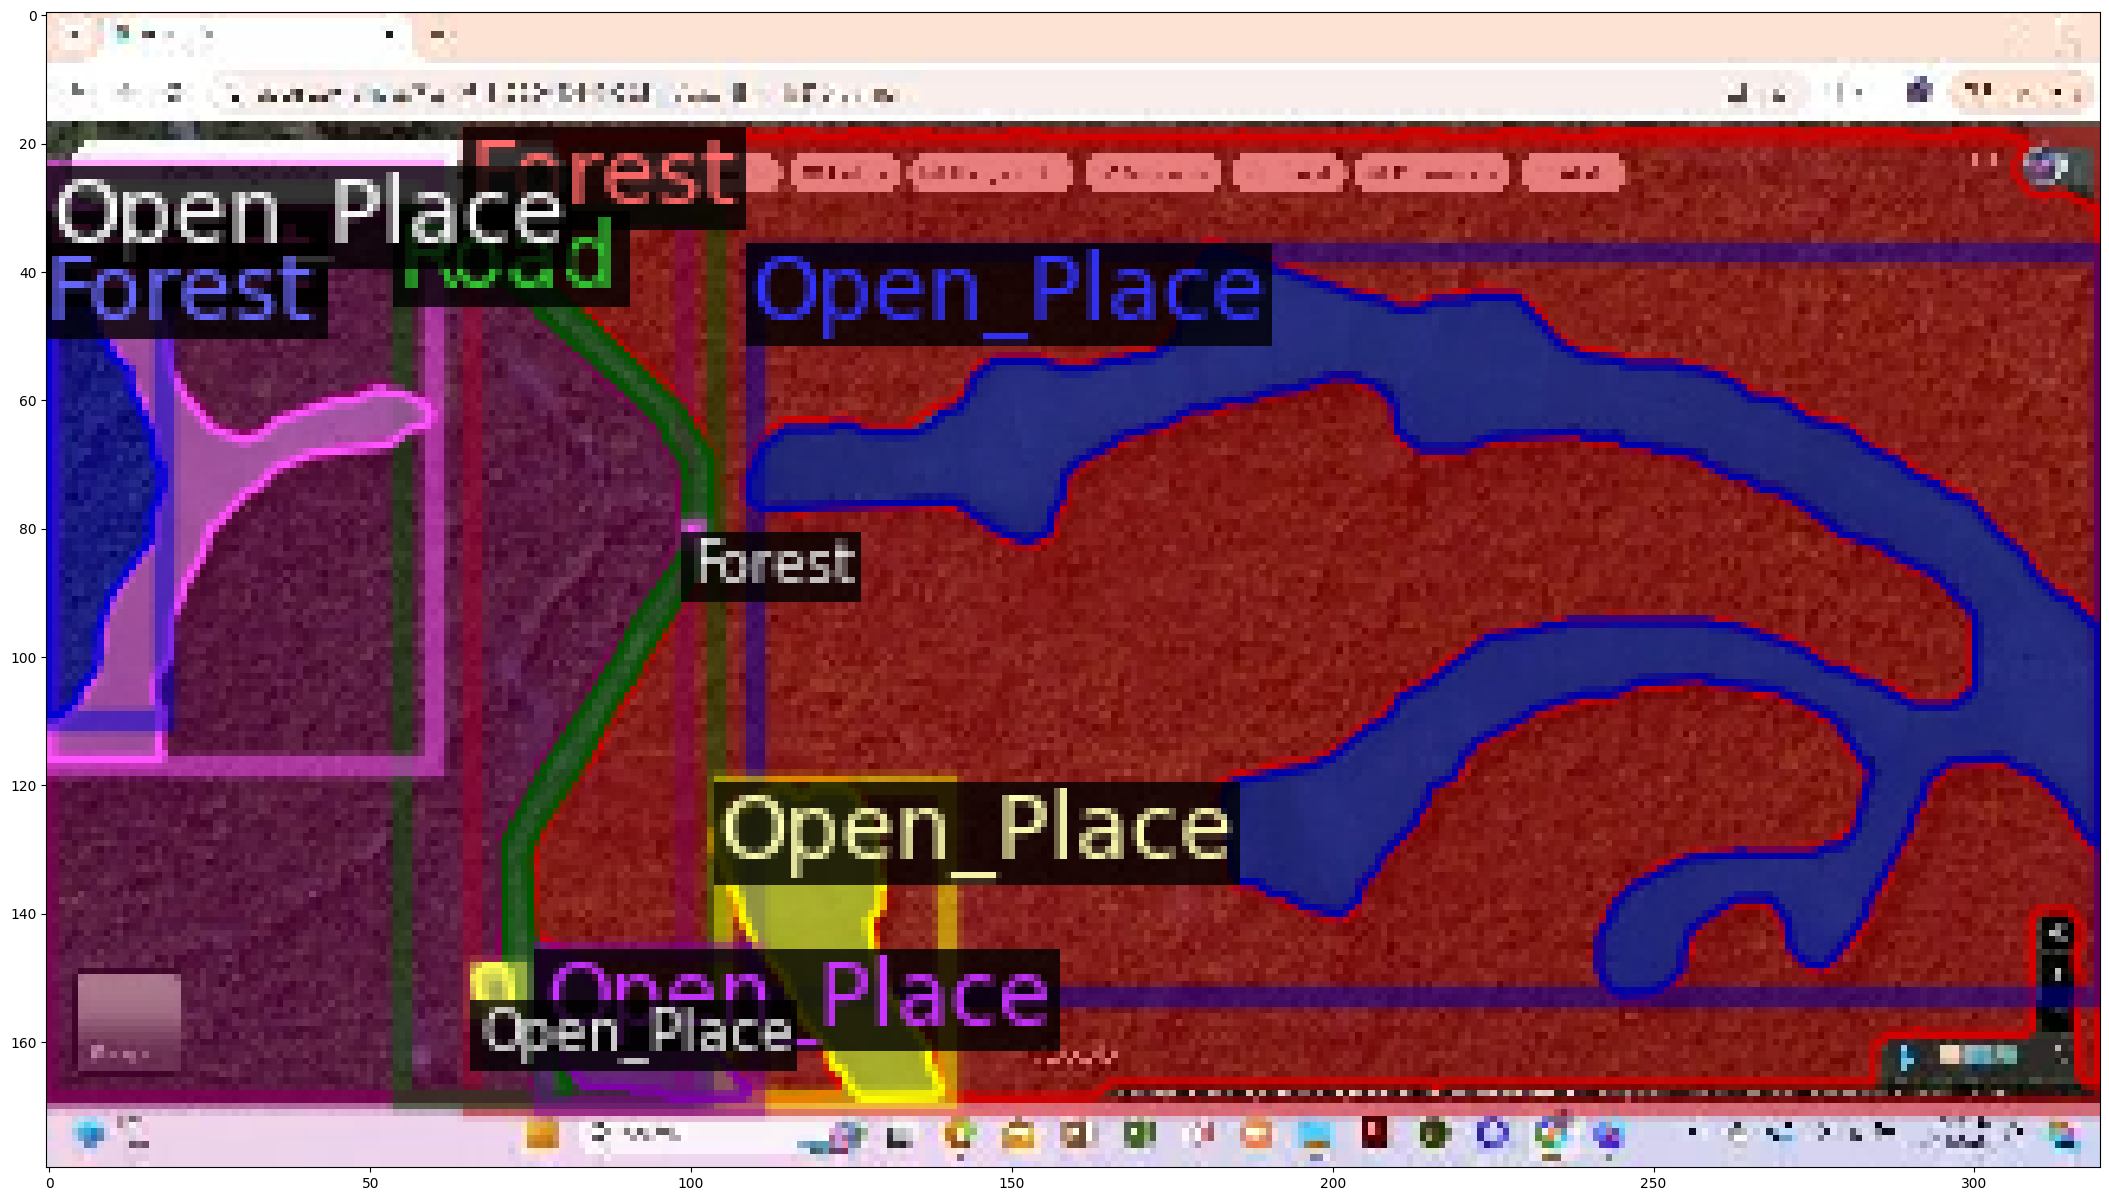

In [3]:
from matplotlib import pyplot as plt

for d in random.sample(train_dataset_dicts, 2):
  plt.figure(figsize=(30, 15))
  img = cv2.imread(d["file_name"])
  visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
  vis = visualizer.draw_dataset_dict(d)
  plt.imshow(vis.get_image()[:, :, ::-1])
  plt.show()

In [4]:
img_plot = "/kaggle/input/sat-img-all/merged_train_images/Abahani-Field_png.rf.3f78f820459a90776d276cd92a05b611.jpg"

#  R101-C4

[11/10 20:31:28 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

model_final_a2914c.pkl: 220MB [00:00, 245MB/s]                            


[11/10 20:31:30 d2.engine.train_loop]: Starting training from iteration 0


/opt/conda/lib/python3.10/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[11/10 20:31:45 d2.utils.events]:  eta: 0:48:24  iter: 19  total_loss: 6.806  loss_cls: 2.903  loss_box_reg: 0.7099  loss_mask: 0.6923  loss_rpn_cls: 2.16  loss_rpn_loc: 0.3293    time: 0.6247  last_time: 0.6637  data_time: 0.0138  last_data_time: 0.0061   lr: 4.9953e-06  max_mem: 3927M
[11/10 20:32:10 d2.utils.events]:  eta: 0:48:00  iter: 39  total_loss: 5.666  loss_cls: 2.815  loss_box_reg: 0.7868  loss_mask: 0.692  loss_rpn_cls: 1.066  loss_rpn_loc: 0.3508    time: 0.6252  last_time: 0.6407  data_time: 0.0064  last_data_time: 0.0091   lr: 9.9903e-06  max_mem: 3931M
[11/10 20:32:23 d2.utils.events]:  eta: 0:47:59  iter: 59  total_loss: 5.01  loss_cls: 2.6  loss_box_reg: 0.8211  loss_mask: 0.691  loss_rpn_cls: 0.6668  loss_rpn_loc: 0.318    time: 0.6311  last_time: 0.6685  data_time: 0.0073  last_data_time: 0.0096   lr: 1.4985e-05  max_mem: 3931M
[11/10 20:32:36 d2.utils.events]:  eta: 0:47:51  iter: 79  total_loss: 4.434  loss_cls: 2.201  loss_box_reg: 0.8459  loss_mask: 0.6897  los

/opt/conda/lib/python3.10/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

[11/10 21:20:13 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [11/10 21:20:14 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/10 21:20:14 d2.data.datasets.coco]: Loaded 62 images in COCO format from /kaggle/input/sat-img-all/combined_1/valid/_annotations.coco.json
[11/10 21:20:14 d2.data.build]: Distribution of instances among all 19 categories:
|   category    | #instances   |  category   | #instances   |  category  | #instances   |
|:-------------:|:-------------|:-----------:|:-------------|:----------:|:-------------|
| Buildings-T.. | 0            |  Buildings  | 1880         |  Deep_Sea  | 10           |
|     Farm      | 55           |   Forest    | 40           |   Harbor   | 7            |
|     Hill      | 5            |   Island    | 0            |    Lake    | 80           |
|  Open_Place   | 390          |    River    | 25           |    Road    

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[11/10 21:20:17 d2.evaluation.evaluator]: Inference done 11/62. Dataloading: 0.0015 s/iter. Inference: 0.3147 s/iter. Eval: 0.0060 s/iter. Total: 0.3222 s/iter. ETA=0:00:16
[11/10 21:20:22 d2.evaluation.evaluator]: Inference done 31/62. Dataloading: 0.0017 s/iter. Inference: 0.2664 s/iter. Eval: 0.0072 s/iter. Total: 0.2754 s/iter. ETA=0:00:08
[11/10 21:20:28 d2.evaluation.evaluator]: Inference done 49/62. Dataloading: 0.0017 s/iter. Inference: 0.2731 s/iter. Eval: 0.0089 s/iter. Total: 0.2839 s/iter. ETA=0:00:03


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[11/10 21:20:32 d2.evaluation.evaluator]: Total inference time: 0:00:16.892159 (0.296354 s / iter per device, on 1 devices)
[11/10 21:20:32 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:16 (0.282082 s / iter per device, on 1 devices)
[11/10 21:20:32 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[11/10 21:20:32 d2.evaluation.coco_evaluation]: Saving results to /content/Detectron2_Models/mask_rcnn_R_101_C4_3x/coco_instances_results.json
[11/10 21:20:32 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=3.19s).
Accumulating evaluation results...
DONE (t=0.13s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.264
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.399
 Average Precision  (AP) @[ IoU=0.75      | area

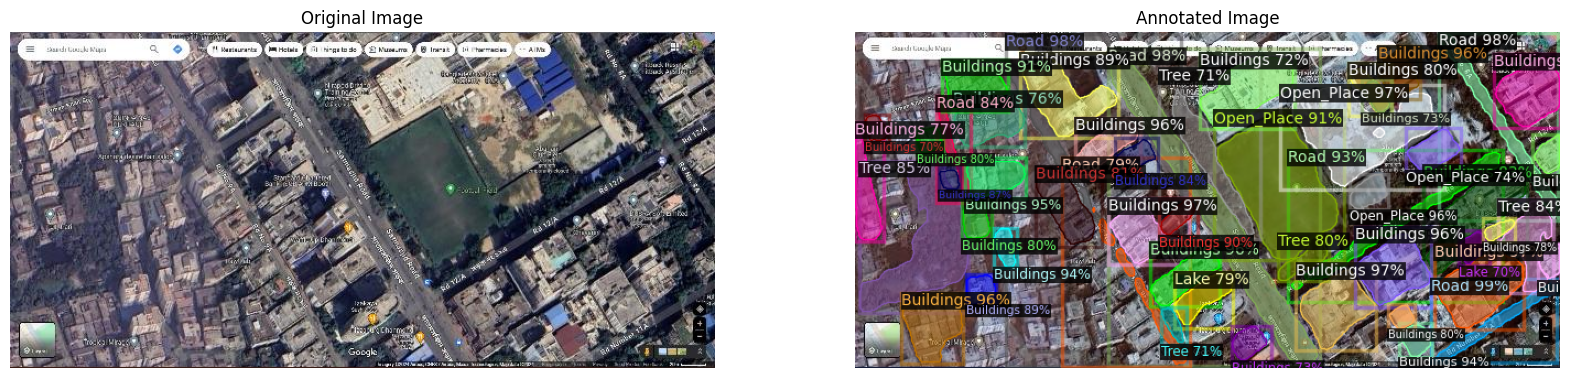

In [ ]:
import os
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
import yaml

# Define the model name
model_name = "mask_rcnn_R_101_C4_3x"

# Set the output directory based on the model name
output_dir = f"/content/Detectron2_Models/{model_name}"
os.makedirs(output_dir, exist_ok=True)

# Initialize configuration
cfg = get_cfg()
cfg.OUTPUT_DIR = output_dir
cfg.merge_from_file(model_zoo.get_config_file(f"COCO-InstanceSegmentation/{model_name}.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(f"COCO-InstanceSegmentation/{model_name}.yaml")

iterations_per_epoch = num_images // cfg.SOLVER.IMS_PER_BATCH

cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 20


config_yaml_path = os.path.join(output_dir, "config.yaml")
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)


trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


model_weights_path = os.path.join(output_dir, "model_final.pth")
cfg.MODEL.WEIGHTS = model_weights_path




from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_val", output_dir=output_dir)
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))


import cv2
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer


new_im = cv2.imread(img_plot)

v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


new_im_rgb = cv2.cvtColor(new_im, cv2.COLOR_BGR2RGB)
out_img_rgb = out.get_image()[:, :, ::-1]
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(new_im_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(out_img_rgb)
ax[1].set_title("Annotated Image")
ax[1].axis("off")
plt.show()


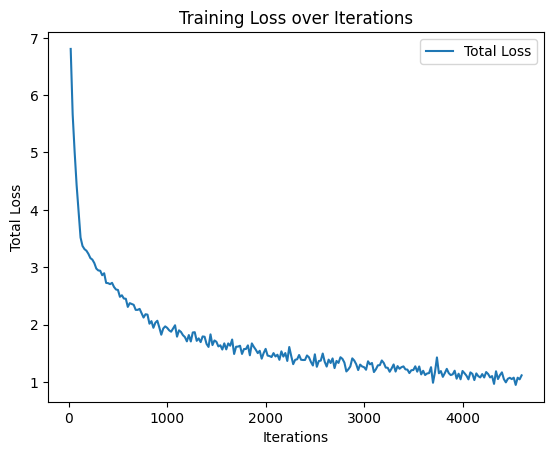

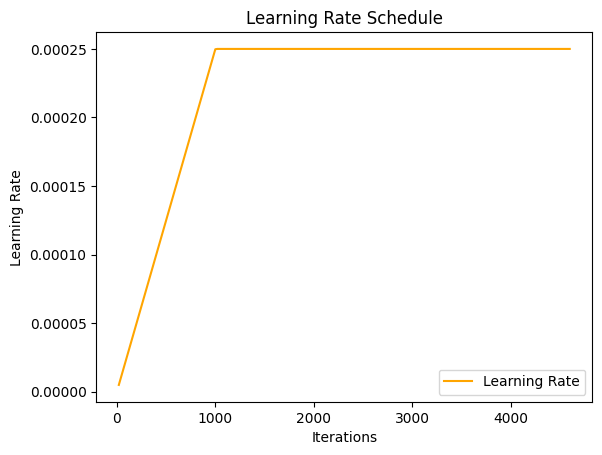

In [6]:
import json
import os
import matplotlib.pyplot as plt

# Load the metrics data
metrics_file = os.path.join(output_dir, "metrics.json")
with open(metrics_file, "r") as f:
    metrics_data = [json.loads(line) for line in f]

# Extract specific metrics and plot only when both iteration and metric are present
iterations = [x["iteration"] for x in metrics_data if "iteration" in x and "total_loss" in x]
total_loss = [x["total_loss"] for x in metrics_data if "iteration" in x and "total_loss" in x]
learning_rate = [x["lr"] for x in metrics_data if "iteration" in x and "lr" in x]
inference_time = [x["inference_time"] for x in metrics_data if "iteration" in x and "inference_time" in x]
memory = [x["memory"] for x in metrics_data if "iteration" in x and "memory" in x]
bbox_ap = [x["bbox/AP"] for x in metrics_data if "iteration" in x and "bbox/AP" in x]
segm_ap = [x["segm/AP"] for x in metrics_data if "iteration" in x and "segm/AP" in x]

# Total Loss plot
plt.figure()
plt.plot(iterations, total_loss, label="Total Loss")
plt.xlabel("Iterations")
plt.ylabel("Total Loss")
plt.title("Training Loss over Iterations")
plt.legend()
plt.show()

# Learning Rate plot
if len(learning_rate) == len(iterations):
    plt.figure()
    plt.plot(iterations, learning_rate, label="Learning Rate", color="orange")
    plt.xlabel("Iterations")
    plt.ylabel("Learning Rate")
    plt.title("Learning Rate Schedule")
    plt.legend()
    plt.show()

# Inference Time plot
if len(inference_time) == len(iterations):
    plt.figure()
    plt.plot(iterations, inference_time, label="Inference Time (ms)", color="green")
    plt.xlabel("Iterations")
    plt.ylabel("Inference Time (ms)")
    plt.title("Inference Time per Image")
    plt.legend()
    plt.show()

# Memory Usage plot
if len(memory) == len(iterations):
    plt.figure()
    plt.plot(iterations, memory, label="Memory Usage (MB)", color="purple")
    plt.xlabel("Iterations")
    plt.ylabel("Memory Usage (MB)")
    plt.title("Memory Usage over Iterations")
    plt.legend()
    plt.show()

# AP for bounding boxes and segmentation
if len(bbox_ap) == len(iterations) and len(segm_ap) == len(iterations):
    plt.figure()
    plt.plot(iterations, bbox_ap, label="Bounding Box AP", color="blue")
    plt.plot(iterations, segm_ap, label="Segmentation AP", color="red")
    plt.xlabel("Iterations")
    plt.ylabel("Average Precision (AP)")
    plt.title("AP for Bounding Boxes and Segmentation")
    plt.legend()
    plt.show()


# R101-DC5

[11/10 21:20:44 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

model_final_0464b7.pkl: 766MB [00:02, 262MB/s]                            


[11/10 21:20:48 d2.engine.train_loop]: Starting training from iteration 0


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[11/10 21:21:03 d2.utils.events]:  eta: 0:56:01  iter: 19  total_loss: 6.88  loss_cls: 2.964  loss_box_reg: 0.643  loss_mask: 0.6913  loss_rpn_cls: 2.205  loss_rpn_loc: 0.3327    time: 0.7099  last_time: 0.7663  data_time: 0.0164  last_data_time: 0.0055   lr: 4.9953e-06  max_mem: 6521M
[11/10 21:21:18 d2.utils.events]:  eta: 0:54:57  iter: 39  total_loss: 5.947  loss_cls: 2.868  loss_box_reg: 0.7731  loss_mask: 0.6916  loss_rpn_cls: 1.19  loss_rpn_loc: 0.3102    time: 0.7264  last_time: 0.6770  data_time: 0.0064  last_data_time: 0.0051   lr: 9.9903e-06  max_mem: 6521M
[11/10 21:21:32 d2.utils.events]:  eta: 0:54:30  iter: 59  total_loss: 5.114  loss_cls: 2.619  loss_box_reg: 0.8404  loss_mask: 0.6909  loss_rpn_cls: 0.5509  loss_rpn_loc: 0.287    time: 0.7252  last_time: 0.6983  data_time: 0.0065  last_data_time: 0.0050   lr: 1.4985e-05  max_mem: 6521M
[11/10 21:21:46 d2.utils.events]:  eta: 0:54:15  iter: 79  total_loss: 4.642  loss_cls: 2.321  loss_box_reg: 0.8354  loss_mask: 0.6899  

/opt/conda/lib/python3.10/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

[11/10 22:15:35 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [11/10 22:15:35 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/10 22:15:35 d2.data.datasets.coco]: Loaded 62 images in COCO format from /kaggle/input/sat-img-all/combined_1/valid/_annotations.coco.json
[11/10 22:15:36 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/10 22:15:36 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[11/10 22:15:36 d2.data.common]: Serializing 62 elements to byte tensors and concatenating them all ...
[11/10 22:15:36 d2.data.common]: Serialized dataset takes 1.66 MiB
[11/10 22:15:36 d2.evaluation.evaluator]: Start inference on 62 batches


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[11/10 22:15:38 d2.evaluation.evaluator]: Inference done 11/62. Dataloading: 0.0013 s/iter. Inference: 0.1967 s/iter. Eval: 0.0041 s/iter. Total: 0.2021 s/iter. ETA=0:00:10
[11/10 22:15:43 d2.evaluation.evaluator]: Inference done 38/62. Dataloading: 0.0023 s/iter. Inference: 0.1848 s/iter. Eval: 0.0070 s/iter. Total: 0.1942 s/iter. ETA=0:00:04


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[11/10 22:15:48 d2.evaluation.evaluator]: Total inference time: 0:00:11.283339 (0.197953 s / iter per device, on 1 devices)
[11/10 22:15:48 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:10 (0.185449 s / iter per device, on 1 devices)
[11/10 22:15:48 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[11/10 22:15:48 d2.evaluation.coco_evaluation]: Saving results to /content/Detectron2_Models/mask_rcnn_R_101_DC5_3x/coco_instances_results.json
[11/10 22:15:48 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.34s).
Accumulating evaluation results...
DONE (t=0.13s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.235
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.369
 Average Precision  (AP) @[ IoU=0.75      | are

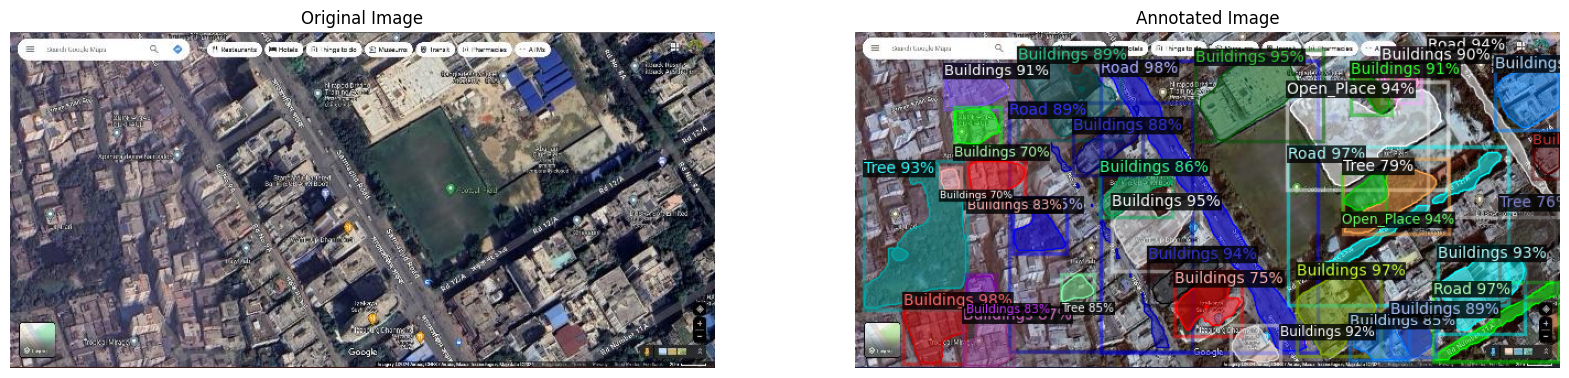

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
import os
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
import yaml

# Define the model name
model_name = "mask_rcnn_R_101_DC5_3x"
# Set the output directory based on the model name
output_dir = f"/content/Detectron2_Models/{model_name}"
os.makedirs(output_dir, exist_ok=True)

# Initialize configuration
cfg = get_cfg()
cfg.OUTPUT_DIR = output_dir
cfg.merge_from_file(model_zoo.get_config_file(f"COCO-InstanceSegmentation/{model_name}.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(f"COCO-InstanceSegmentation/{model_name}.yaml")

iterations_per_epoch = num_images // cfg.SOLVER.IMS_PER_BATCH

cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 20


config_yaml_path = os.path.join(output_dir, "config.yaml")
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)


trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


model_weights_path = os.path.join(output_dir, "model_final.pth")
cfg.MODEL.WEIGHTS = model_weights_path




from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_val", output_dir=output_dir)
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))


import cv2
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer


new_im = cv2.imread(img_plot)

v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


new_im_rgb = cv2.cvtColor(new_im, cv2.COLOR_BGR2RGB)
out_img_rgb = out.get_image()[:, :, ::-1]
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(new_im_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(out_img_rgb)
ax[1].set_title("Annotated Image")
ax[1].axis("off")
plt.show()



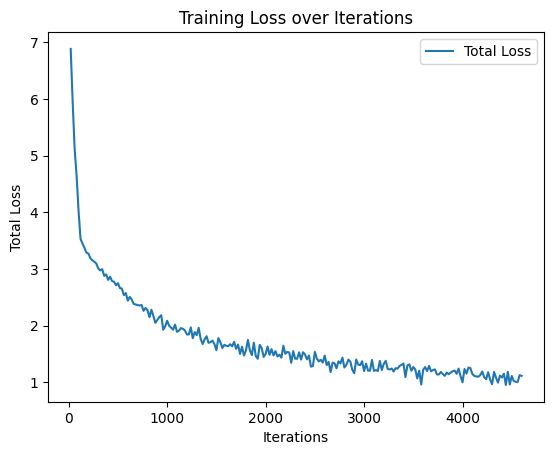

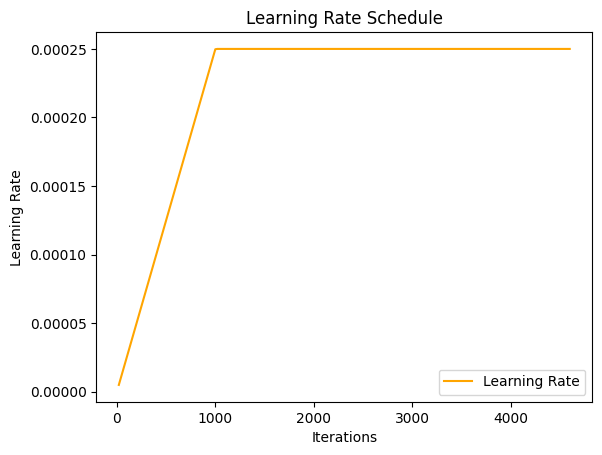

In [8]:
import json
import os
import matplotlib.pyplot as plt

# Load the metrics data
metrics_file = os.path.join(output_dir, "metrics.json")
with open(metrics_file, "r") as f:
    metrics_data = [json.loads(line) for line in f]

# Extract specific metrics and plot only when both iteration and metric are present
iterations = [x["iteration"] for x in metrics_data if "iteration" in x and "total_loss" in x]
total_loss = [x["total_loss"] for x in metrics_data if "iteration" in x and "total_loss" in x]
learning_rate = [x["lr"] for x in metrics_data if "iteration" in x and "lr" in x]
inference_time = [x["inference_time"] for x in metrics_data if "iteration" in x and "inference_time" in x]
memory = [x["memory"] for x in metrics_data if "iteration" in x and "memory" in x]
bbox_ap = [x["bbox/AP"] for x in metrics_data if "iteration" in x and "bbox/AP" in x]
segm_ap = [x["segm/AP"] for x in metrics_data if "iteration" in x and "segm/AP" in x]

# Total Loss plot
plt.figure()
plt.plot(iterations, total_loss, label="Total Loss")
plt.xlabel("Iterations")
plt.ylabel("Total Loss")
plt.title("Training Loss over Iterations")
plt.legend()
plt.show()

# Learning Rate plot
if len(learning_rate) == len(iterations):
    plt.figure()
    plt.plot(iterations, learning_rate, label="Learning Rate", color="orange")
    plt.xlabel("Iterations")
    plt.ylabel("Learning Rate")
    plt.title("Learning Rate Schedule")
    plt.legend()
    plt.show()

# Inference Time plot
if len(inference_time) == len(iterations):
    plt.figure()
    plt.plot(iterations, inference_time, label="Inference Time (ms)", color="green")
    plt.xlabel("Iterations")
    plt.ylabel("Inference Time (ms)")
    plt.title("Inference Time per Image")
    plt.legend()
    plt.show()

# Memory Usage plot
if len(memory) == len(iterations):
    plt.figure()
    plt.plot(iterations, memory, label="Memory Usage (MB)", color="purple")
    plt.xlabel("Iterations")
    plt.ylabel("Memory Usage (MB)")
    plt.title("Memory Usage over Iterations")
    plt.legend()
    plt.show()

# AP for bounding boxes and segmentation
if len(bbox_ap) == len(iterations) and len(segm_ap) == len(iterations):
    plt.figure()
    plt.plot(iterations, bbox_ap, label="Bounding Box AP", color="blue")
    plt.plot(iterations, segm_ap, label="Segmentation AP", color="red")
    plt.xlabel("Iterations")
    plt.ylabel("Average Precision (AP)")
    plt.title("AP for Bounding Boxes and Segmentation")
    plt.legend()
    plt.show()


# R101-FPN

[11/10 22:15:56 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_a3ec72.pkl: 254MB [00:01, 242MB/s]                             


[11/10 22:15:58 d2.engine.train_loop]: Starting training from iteration 0


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[11/10 22:16:07 d2.utils.events]:  eta: 0:32:47  iter: 19  total_loss: 6.482  loss_cls: 3.112  loss_box_reg: 0.5218  loss_mask: 0.6925  loss_rpn_cls: 1.845  loss_rpn_loc: 0.3078    time: 0.4351  last_time: 0.4156  data_time: 0.0146  last_data_time: 0.0052   lr: 4.9953e-06  max_mem: 6535M
[11/10 22:16:16 d2.utils.events]:  eta: 0:32:49  iter: 39  total_loss: 5.754  loss_cls: 3.038  loss_box_reg: 0.643  loss_mask: 0.692  loss_rpn_cls: 1.109  loss_rpn_loc: 0.3043    time: 0.4379  last_time: 0.4066  data_time: 0.0066  last_data_time: 0.0052   lr: 9.9903e-06  max_mem: 6535M
[11/10 22:16:25 d2.utils.events]:  eta: 0:34:12  iter: 59  total_loss: 5.011  loss_cls: 2.836  loss_box_reg: 0.7008  loss_mask: 0.6915  loss_rpn_cls: 0.5515  loss_rpn_loc: 0.2505    time: 0.4411  last_time: 0.4720  data_time: 0.0060  last_data_time: 0.0056   lr: 1.4985e-05  max_mem: 6535M
[11/10 22:16:34 d2.utils.events]:  eta: 0:34:17  iter: 79  total_loss: 4.711  loss_cls: 2.644  loss_box_reg: 0.6755  loss_mask: 0.6898

/opt/conda/lib/python3.10/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

[11/10 22:50:39 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [11/10 22:50:39 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/10 22:50:39 d2.data.datasets.coco]: Loaded 62 images in COCO format from /kaggle/input/sat-img-all/combined_1/valid/_annotations.coco.json
[11/10 22:50:39 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/10 22:50:39 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[11/10 22:50:39 d2.data.common]: Serializing 62 elements to byte tensors and concatenating them all ...
[11/10 22:50:39 d2.data.common]: Serialized dataset takes 1.66 MiB
[11/10 22:50:39 d2.evaluation.evaluator]: Start inference on 62 batches


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[11/10 22:50:41 d2.evaluation.evaluator]: Inference done 11/62. Dataloading: 0.0016 s/iter. Inference: 0.0891 s/iter. Eval: 0.0039 s/iter. Total: 0.0946 s/iter. ETA=0:00:04


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[11/10 22:50:45 d2.evaluation.evaluator]: Total inference time: 0:00:05.498841 (0.096471 s / iter per device, on 1 devices)
[11/10 22:50:45 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:04 (0.086997 s / iter per device, on 1 devices)
[11/10 22:50:45 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[11/10 22:50:45 d2.evaluation.coco_evaluation]: Saving results to /content/Detectron2_Models/mask_rcnn_R_101_FPN_3x/coco_instances_results.json
[11/10 22:50:45 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.74s).
Accumulating evaluation results...
DONE (t=0.12s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.238
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.358
 Average Precision  (AP) @[ IoU=0.75      | are

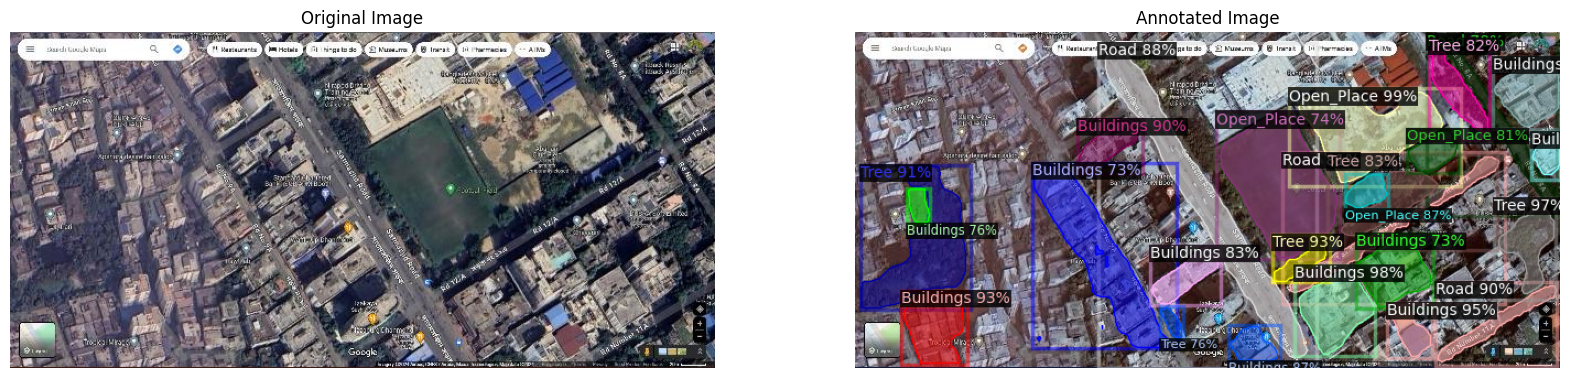

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
import os
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
import yaml

# Define the model name
model_name = "mask_rcnn_R_101_FPN_3x"
# Set the output directory based on the model name
output_dir = f"/content/Detectron2_Models/{model_name}"
os.makedirs(output_dir, exist_ok=True)

# Initialize configuration
cfg = get_cfg()
cfg.OUTPUT_DIR = output_dir
cfg.merge_from_file(model_zoo.get_config_file(f"COCO-InstanceSegmentation/{model_name}.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(f"COCO-InstanceSegmentation/{model_name}.yaml")

iterations_per_epoch = num_images // cfg.SOLVER.IMS_PER_BATCH

cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 20


config_yaml_path = os.path.join(output_dir, "config.yaml")
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)


trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


model_weights_path = os.path.join(output_dir, "model_final.pth")
cfg.MODEL.WEIGHTS = model_weights_path




from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_val", output_dir=output_dir)
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))


import cv2
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer


new_im = cv2.imread(img_plot)

v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


new_im_rgb = cv2.cvtColor(new_im, cv2.COLOR_BGR2RGB)
out_img_rgb = out.get_image()[:, :, ::-1]
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(new_im_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(out_img_rgb)
ax[1].set_title("Annotated Image")
ax[1].axis("off")
plt.show()


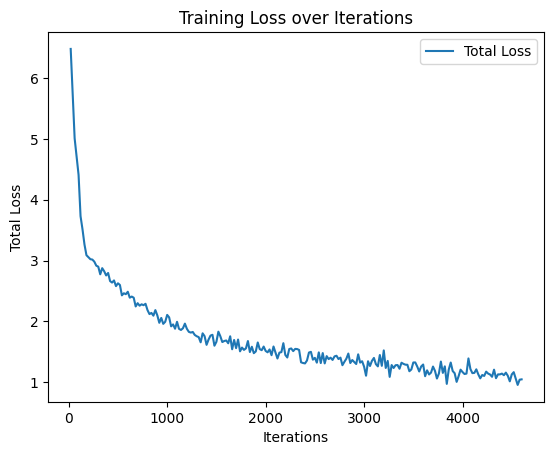

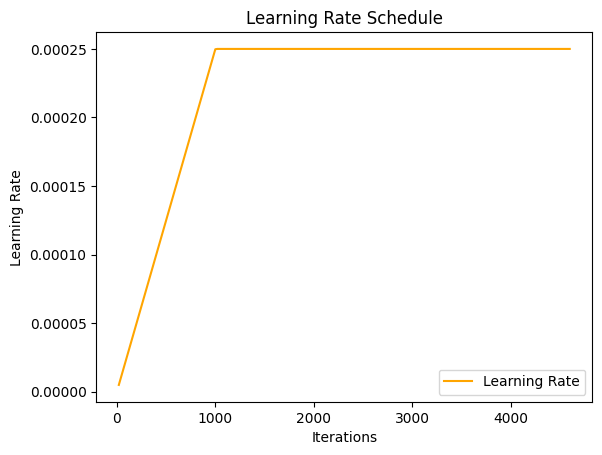

In [10]:
import json
import os
import matplotlib.pyplot as plt

# Load the metrics data
metrics_file = os.path.join(output_dir, "metrics.json")
with open(metrics_file, "r") as f:
    metrics_data = [json.loads(line) for line in f]

# Extract specific metrics and plot only when both iteration and metric are present
iterations = [x["iteration"] for x in metrics_data if "iteration" in x and "total_loss" in x]
total_loss = [x["total_loss"] for x in metrics_data if "iteration" in x and "total_loss" in x]
learning_rate = [x["lr"] for x in metrics_data if "iteration" in x and "lr" in x]
inference_time = [x["inference_time"] for x in metrics_data if "iteration" in x and "inference_time" in x]
memory = [x["memory"] for x in metrics_data if "iteration" in x and "memory" in x]
bbox_ap = [x["bbox/AP"] for x in metrics_data if "iteration" in x and "bbox/AP" in x]
segm_ap = [x["segm/AP"] for x in metrics_data if "iteration" in x and "segm/AP" in x]

# Total Loss plot
plt.figure()
plt.plot(iterations, total_loss, label="Total Loss")
plt.xlabel("Iterations")
plt.ylabel("Total Loss")
plt.title("Training Loss over Iterations")
plt.legend()
plt.show()

# Learning Rate plot
if len(learning_rate) == len(iterations):
    plt.figure()
    plt.plot(iterations, learning_rate, label="Learning Rate", color="orange")
    plt.xlabel("Iterations")
    plt.ylabel("Learning Rate")
    plt.title("Learning Rate Schedule")
    plt.legend()
    plt.show()

# Inference Time plot
if len(inference_time) == len(iterations):
    plt.figure()
    plt.plot(iterations, inference_time, label="Inference Time (ms)", color="green")
    plt.xlabel("Iterations")
    plt.ylabel("Inference Time (ms)")
    plt.title("Inference Time per Image")
    plt.legend()
    plt.show()

# Memory Usage plot
if len(memory) == len(iterations):
    plt.figure()
    plt.plot(iterations, memory, label="Memory Usage (MB)", color="purple")
    plt.xlabel("Iterations")
    plt.ylabel("Memory Usage (MB)")
    plt.title("Memory Usage over Iterations")
    plt.legend()
    plt.show()

# AP for bounding boxes and segmentation
if len(bbox_ap) == len(iterations) and len(segm_ap) == len(iterations):
    plt.figure()
    plt.plot(iterations, bbox_ap, label="Bounding Box AP", color="blue")
    plt.plot(iterations, segm_ap, label="Segmentation AP", color="red")
    plt.xlabel("Iterations")
    plt.ylabel("Average Precision (AP)")
    plt.title("AP for Bounding Boxes and Segmentation")
    plt.legend()
    plt.show()


# X101-FPN

[11/10 22:50:53 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_2d9806.pkl: 431MB [00:01, 259MB/s]                             


[11/10 22:50:56 d2.engine.train_loop]: Starting training from iteration 0


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[11/10 22:51:20 d2.utils.events]:  eta: 1:30:07  iter: 19  total_loss: 6.831  loss_cls: 2.997  loss_box_reg: 0.6093  loss_mask: 0.6928  loss_rpn_cls: 2.219  loss_rpn_loc: 0.2877    time: 1.2357  last_time: 1.1116  data_time: 0.0164  last_data_time: 0.0058   lr: 4.9953e-06  max_mem: 6977M
[11/10 22:51:45 d2.utils.events]:  eta: 1:29:07  iter: 39  total_loss: 5.851  loss_cls: 2.953  loss_box_reg: 0.6401  loss_mask: 0.6926  loss_rpn_cls: 1.256  loss_rpn_loc: 0.2626    time: 1.2284  last_time: 1.3688  data_time: 0.0069  last_data_time: 0.0086   lr: 9.9903e-06  max_mem: 6977M
[11/10 22:52:08 d2.utils.events]:  eta: 1:28:34  iter: 59  total_loss: 5.013  loss_cls: 2.798  loss_box_reg: 0.6654  loss_mask: 0.6912  loss_rpn_cls: 0.57  loss_rpn_loc: 0.2922    time: 1.2078  last_time: 1.3677  data_time: 0.0069  last_data_time: 0.0060   lr: 1.4985e-05  max_mem: 6977M
[11/10 22:52:32 d2.utils.events]:  eta: 1:28:14  iter: 79  total_loss: 4.565  loss_cls: 2.608  loss_box_reg: 0.7028  loss_mask: 0.6904

/opt/conda/lib/python3.10/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

[11/11 00:22:43 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [11/11 00:22:43 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/11 00:22:43 d2.data.datasets.coco]: Loaded 62 images in COCO format from /kaggle/input/sat-img-all/combined_1/valid/_annotations.coco.json
[11/11 00:22:43 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/11 00:22:43 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[11/11 00:22:43 d2.data.common]: Serializing 62 elements to byte tensors and concatenating them all ...
[11/11 00:22:43 d2.data.common]: Serialized dataset takes 1.66 MiB
[11/11 00:22:43 d2.evaluation.evaluator]: Start inference on 62 batches


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[11/11 00:22:45 d2.evaluation.evaluator]: Inference done 11/62. Dataloading: 0.0013 s/iter. Inference: 0.1764 s/iter. Eval: 0.0045 s/iter. Total: 0.1822 s/iter. ETA=0:00:09
[11/11 00:22:50 d2.evaluation.evaluator]: Inference done 38/62. Dataloading: 0.0019 s/iter. Inference: 0.1793 s/iter. Eval: 0.0064 s/iter. Total: 0.1877 s/iter. ETA=0:00:04


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[11/11 00:22:54 d2.evaluation.evaluator]: Total inference time: 0:00:10.345109 (0.181493 s / iter per device, on 1 devices)
[11/11 00:22:54 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:09 (0.168256 s / iter per device, on 1 devices)
[11/11 00:22:54 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[11/11 00:22:54 d2.evaluation.coco_evaluation]: Saving results to /content/Detectron2_Models/mask_rcnn_X_101_32x8d_FPN_3x/coco_instances_results.json
[11/11 00:22:54 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.56s).
Accumulating evaluation results...
DONE (t=0.13s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.387
 Average Precision  (AP) @[ IoU=0.75     

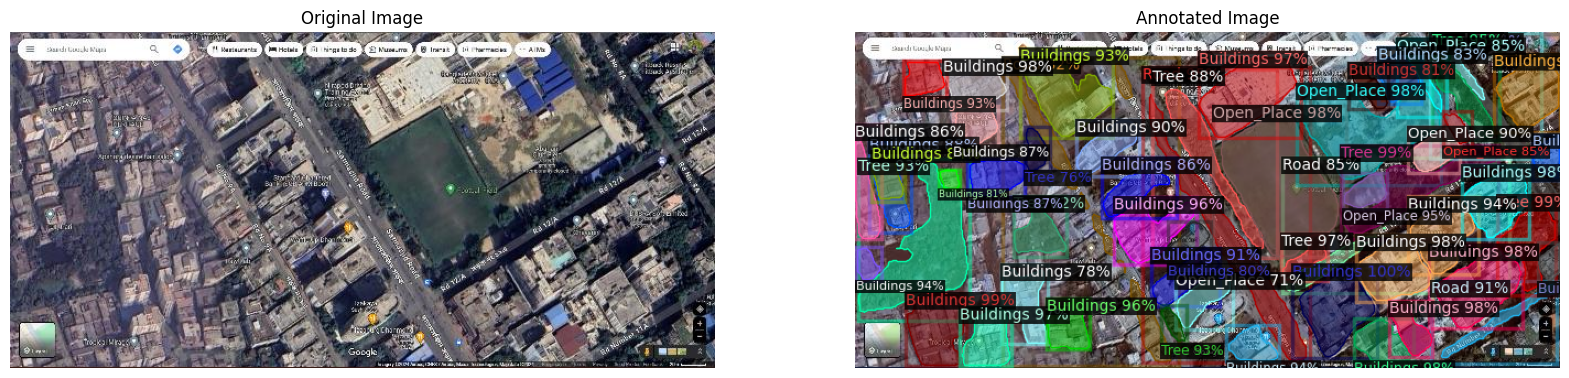

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
import os
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
import yaml

# Define the model name
model_name = "mask_rcnn_X_101_32x8d_FPN_3x"

# Set the output directory based on the model name
output_dir = f"/content/Detectron2_Models/{model_name}"
os.makedirs(output_dir, exist_ok=True)

# Initialize configuration
cfg = get_cfg()
cfg.OUTPUT_DIR = output_dir
cfg.merge_from_file(model_zoo.get_config_file(f"COCO-InstanceSegmentation/{model_name}.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(f"COCO-InstanceSegmentation/{model_name}.yaml")

iterations_per_epoch = num_images // cfg.SOLVER.IMS_PER_BATCH

cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 20


config_yaml_path = os.path.join(output_dir, "config.yaml")
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)


trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


model_weights_path = os.path.join(output_dir, "model_final.pth")
cfg.MODEL.WEIGHTS = model_weights_path




from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_val", output_dir=output_dir)
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))


import cv2
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer


new_im = cv2.imread(img_plot)

v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


new_im_rgb = cv2.cvtColor(new_im, cv2.COLOR_BGR2RGB)
out_img_rgb = out.get_image()[:, :, ::-1]
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(new_im_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(out_img_rgb)
ax[1].set_title("Annotated Image")
ax[1].axis("off")
plt.show()


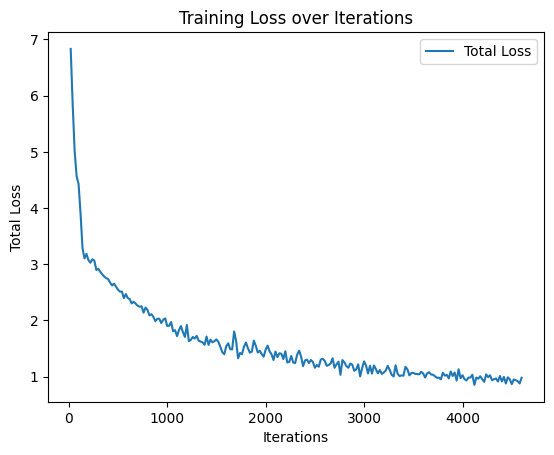

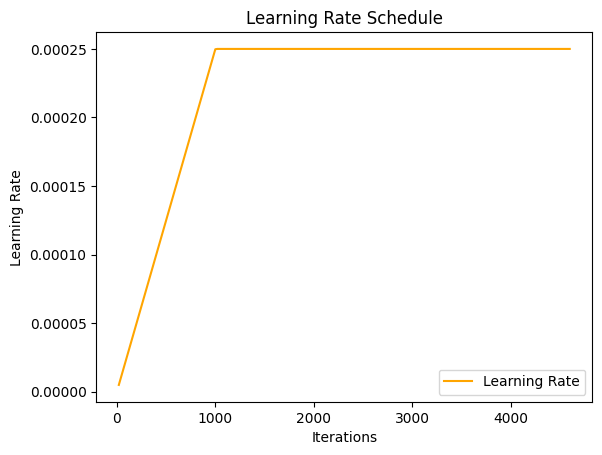

In [12]:
import json
import os
import matplotlib.pyplot as plt

# Load the metrics data
metrics_file = os.path.join(output_dir, "metrics.json")
with open(metrics_file, "r") as f:
    metrics_data = [json.loads(line) for line in f]

# Extract specific metrics and plot only when both iteration and metric are present
iterations = [x["iteration"] for x in metrics_data if "iteration" in x and "total_loss" in x]
total_loss = [x["total_loss"] for x in metrics_data if "iteration" in x and "total_loss" in x]
learning_rate = [x["lr"] for x in metrics_data if "iteration" in x and "lr" in x]
inference_time = [x["inference_time"] for x in metrics_data if "iteration" in x and "inference_time" in x]
memory = [x["memory"] for x in metrics_data if "iteration" in x and "memory" in x]
bbox_ap = [x["bbox/AP"] for x in metrics_data if "iteration" in x and "bbox/AP" in x]
segm_ap = [x["segm/AP"] for x in metrics_data if "iteration" in x and "segm/AP" in x]

# Total Loss plot
plt.figure()
plt.plot(iterations, total_loss, label="Total Loss")
plt.xlabel("Iterations")
plt.ylabel("Total Loss")
plt.title("Training Loss over Iterations")
plt.legend()
plt.show()

# Learning Rate plot
if len(learning_rate) == len(iterations):
    plt.figure()
    plt.plot(iterations, learning_rate, label="Learning Rate", color="orange")
    plt.xlabel("Iterations")
    plt.ylabel("Learning Rate")
    plt.title("Learning Rate Schedule")
    plt.legend()
    plt.show()

# Inference Time plot
if len(inference_time) == len(iterations):
    plt.figure()
    plt.plot(iterations, inference_time, label="Inference Time (ms)", color="green")
    plt.xlabel("Iterations")
    plt.ylabel("Inference Time (ms)")
    plt.title("Inference Time per Image")
    plt.legend()
    plt.show()

# Memory Usage plot
if len(memory) == len(iterations):
    plt.figure()
    plt.plot(iterations, memory, label="Memory Usage (MB)", color="purple")
    plt.xlabel("Iterations")
    plt.ylabel("Memory Usage (MB)")
    plt.title("Memory Usage over Iterations")
    plt.legend()
    plt.show()

# AP for bounding boxes and segmentation
if len(bbox_ap) == len(iterations) and len(segm_ap) == len(iterations):
    plt.figure()
    plt.plot(iterations, bbox_ap, label="Bounding Box AP", color="blue")
    plt.plot(iterations, segm_ap, label="Segmentation AP", color="red")
    plt.xlabel("Iterations")
    plt.ylabel("Average Precision (AP)")
    plt.title("AP for Bounding Boxes and Segmentation")
    plt.legend()
    plt.show()
